### Introduction

**Batch normalization** is a popular method to fasten deep-network training process also solving the gradient vanishing or exploding problem. In this [post](https://kentchun33333.github.io/), I am going to first discuss some ideas, then take a glance at math expression on algorithms in original [paper](https://arxiv.org/pdf/1502.03167v3.pdf),and finally take a deep look on how to implement it.


### 1. Brief concepts about normalization

It is quite common to use normalization in neural network, especially deep convnet. Before batch normalization layer, there are several ways/methods like as per-image-normalize, per-image whitening, per-batch normalization, per-batch whitening, local constrast normalization (LCN) and local response normalization (LRN). These methods are actually really good, and is sucessfully working in some conditions.

To me, the main core ideal is simple, that is ** only difference matters while delievering information**. Just think the information like electricity in cpu, nowadays the driving voltage is much lower than the past cpu, but it carried more heavy work, compute even faster and spend less energy. 

**We actually have multiple ways to normalize our data before or after any operation.** A good way or strategy to add the normalization is actually **depending on the operation before or after it.** For example, if you are going to applied a RELU with a threshod equal to 0.5 ( which is not common) and you would like to add a normalization-method before it. You probabily do not want to only add the normalization but also some shift like 0.1 or 0.3 to make sure this RELU-layer do not swipe too many information. For another example, you would like to introduce a **depth-wise or channel-wise normalization** after the conv-layer. Because, the conv-layer is actually a depth-wish operation. Depth in conv-operation is actually the numbers of filters/kernels which coressponding to a **( **filter-width \* filter-height \* previous-depth** )** of weights/neurals.

The batch normalization is basically following this concept but adding a trainable feature to it. **This feature makes it beautiful.**

For more informations about normalization, check this [post](http://yeephycho.github.io/2016/08/03/Normalizations-in-neural-networks/).

### 2. Expression in Math 

$ \begin{array} \\
\text{Algorithm 1 : Batch Normalizing Transform, applied to activation x over a mini-batch. } \\  
\hline 
\text{Input : Values of x over a mini-Batch : } B \{  x_{1 \text{ ... m }} \} \text{ ; Parameters to be learned : } \beta \text{ and } \gamma \\
\text{Output : A set of } Y : \{ y_{i} = \text{ BatchNorm}_{\beta, \gamma}(x^{i}) \} \\
\text{ } \mu_{ \beta } \leftarrow  \frac{1}{m} \sum_{i=1}^m (x_{i}) \text{ ----------------- mini-batch mean}\\
\text{ } \alpha^{2}_{ \beta } \leftarrow  \frac{1}{m} \sum_{i=1}^m (x_{i} - \mu_{\beta})^{2} \text{ --------- mini-batch variance}\\
\text{ } \hat{x}_{i} \leftarrow \frac{x_{i} - \mu_{\beta}}{\sqrt{\alpha^{2}_{\beta}+ \epsilon}} \text{ ---------------------- normalization where epsilon is the number to prevent dividing zero } \\
\text{ } y_{i} \leftarrow \gamma \hat{x}_{i} + \beta = \text{BN}_{\gamma, \beta}(x_{i}) \text{ -------- scale and shift}\\
\end{array} $


$ \begin{array} \\
\text{Algorithm 2 : Training a Batch-Normalized Network } \\  
\hline 
\text{Input : Network N with trainable parameters } \Theta \text{ ; subset of activations } \{ x^{(k)}\}^{K}_{k=1} \\
\text{Output : Batch-normalized network for inference, N}^{inf}_{\text{BN}} \\
\text{ 1: N}^{\text{tr}}_{\text{BN}} \leftarrow \text{ N ------ Training BN network} \\
\text{ 2: } \textbf{for } k = 1 ... K \textbf{  do } : \\ 
\text{ 3: Add transformation } y^{(k)} = \text{BN}_{\gamma^{(k)}, \beta^{(k)}}(x^{(k)}) \text{ to N}^{\text{tr}}_{\text{BN}} \text{ ( Alg. 1 )} \\ 
\text{ 4: Modify each layer in N}^{\text{tr}}_{\text{BN}} \text{ with input } x^{(k)} \text{ to take } y^{(k)} \text{ instead} \\
\text{ 5: } \textbf{end for }\\
\\
\text{ 6: Train N}^{\text{tr}}_{\text{BN}} \text{ to optimize the parameters } \Theta \cup \{ \gamma^{(k)}, \beta^{(k)} \}^{K}_{k=1}\\
\text{ 7: N}^{\text{inf}}_{\text{BN}} \leftarrow \text{N}^{\text{tr}}_{\text{BN}} text{ ---inference BN network with forzen parameters} \\
\\
\text{ 8: } \textbf{for } k = 1 ... K \textbf{  do } : \\ 
\text{ 9: //For clarity} x=x^{(k)}, \gamma = \gamma^{(k)}, \beta = \beta^{(k)} ... etc \\
\text{10: Process multiple training mini-batches B, each of size m, and average over them :}\\
\text{10: E}[x] \leftarrow \text{E}_{\beta}[\mu_{\beta}]\\
\text{10: Var}[x] \leftarrow \frac{m}{m-1} \text{E}_{\beta}[\alpha^{2}_{\beta}]\\
\text{11: In N}^{\text{inf}}_{\text{BN}} \text{, replace the transform } y = \text{BN}_{\gamma, \beta}(x) \text{ with } y = \frac{\gamma}{\sqrt{\text{Var}[x]+\epsilon}} \dot x + (\beta - \frac{\gamma \text{E}[x]}{\sqrt{\text{Var}[x]+\epsilon}})\\
\text{12: } \textbf{end for }\\
\end{array} $

### 3. Something you should know before diving into code.

To implement batch normalization is, in fact, really simple, as long as, you know the following things : 

#### 3-1 Automatic Differentiation : 

There are basically 4 main methods to compute derivatives or to say **backpropagation**.

- (1) Manually working out derivatives and coding the result

- (2) Numerical differentiation (using finite difference approximations)

- (3) **Symbolic differentiation** (expression manipulation in SW such as Max, Mathematica & Maple)

- (4) **Automatic differentiation** (Forward, Reversed & Optical Jocobian Accumulation)

And most of popular deep learning library had implemented either automatic reverse differenciation or symbolic differenciation while computing gradients and Hessian of an objective fuction.  **Therefore, while implement the batch-normalization layer in real production, we just need to focus on the forward propagation.** (Alg-1)

For more information about automatic differentiation, check this [paper](https://arxiv.org/pdf/1502.05767v2.pdf).

#### 3-2 Moving Average & Variance in mini-batch traning 

Since we usually use mini-batch traning, **the concept of estimation the population average and variance by moving-methods** is introduced while the batch-normalization is in training state. It just makes an approximation of the suitable mean & variance. 


### 4. Batch-normalization in Tensorflow.

The following code is from [tf-contrib-layer.](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/layers/python/layers/layers.py) and the test-case could be found in [a stackoverflow-issue.](http://stackoverflow.com/questions/38312668/how-does-one-do-inference-with-batch-normalization-with-tensor-flow)


```python
@add_arg_scope
def batch_norm(inputs,
               decay=0.999,
               center=True,
               scale=False,
               epsilon=0.001,
               activation_fn=None,
               updates_collections=ops.GraphKeys.UPDATE_OPS,
               is_training=True,
               reuse=None,
               variables_collections=None,
               outputs_collections=None,
               trainable=True,
               scope=None):
  """Adds a Batch Normalization layer from http://arxiv.org/abs/1502.03167.
    "Batch Normalization: Accelerating Deep Network Training by Reducing
    Internal Covariate Shift"
    Sergey Ioffe, Christian Szegedy
  Can be used as a normalizer function for conv2d and fully_connected.
  Args:
    inputs: a tensor of size `[batch_size, height, width, channels]`
            or `[batch_size, channels]`.
    decay: decay for the moving average.
    center: If True, subtract `beta`. If False, `beta` is ignored.
    scale: If True, multiply by `gamma`. If False, `gamma` is
      not used. When the next layer is linear (also e.g. `nn.relu`), this can be
      disabled since the scaling can be done by the next layer.
    epsilon: small float added to variance to avoid dividing by zero.
    activation_fn: Optional activation function.
    updates_collections: collections to collect the update ops for computation.
      If None, a control dependency would be added to make sure the updates are
      computed.
    is_training: whether or not the layer is in training mode. In training mode
      it would accumulate the statistics of the moments into `moving_mean` and
      `moving_variance` using an exponential moving average with the given
      `decay`. When it is not in training mode then it would use the values of
      the `moving_mean` and the `moving_variance`.
    reuse: whether or not the layer and its variables should be reused. To be
      able to reuse the layer scope must be given.
    variables_collections: optional collections for the variables.
    outputs_collections: collections to add the outputs.
    trainable: If `True` also add variables to the graph collection
      `GraphKeys.TRAINABLE_VARIABLES` (see tf.Variable).
    scope: Optional scope for `variable_op_scope`.
  Returns:
    a tensor representing the output of the operation.
  """
  # =========================================================================
  # This variable_op_scope is actually depreciate in r1.1 of TF
  # It basically provide an context-manager for variable_ops
  # 
  with variable_scope.variable_op_scope([inputs],
                                        scope, 'BatchNorm', reuse=reuse) as sc:
    inputs_shape = inputs.get_shape()
    dtype = inputs.dtype.base_dtype
    
    # =======================================================================
    # Base on channel : axis = list(range(len(inputs_shape) - 1)) 
    # -----------------------
    # However, it is suggested that to use axis as [0,1,2] to tf.nn.moments 
    # 
    axis = list(range(len(inputs_shape) - 1)) 
    params_shape = inputs_shape[-1:]
    # Allocate parameters for the beta and gamma of the normalization.
    beta, gamma = None, None
    
    
    # =======================================================================
    # init the variable according to the mode/state/parameters
    
    if center:
      beta_collections = utils.get_variable_collections(variables_collections,
                                                        'beta')
      beta = variables.model_variable('beta',
                                      shape=params_shape,
                                      dtype=dtype,
                                      initializer=init_ops.zeros_initializer,
                                      collections=beta_collections,
                                      trainable=trainable)
    if scale:
      gamma_collections = utils.get_variable_collections(variables_collections,
                                                         'gamma')
      gamma = variables.model_variable('gamma',
                                       shape=params_shape,
                                       dtype=dtype,
                                       initializer=init_ops.ones_initializer,
                                       collections=gamma_collections,
                                       trainable=trainable)
    # =======================================================================
    # Somve moving method 
    # ---------------------
    # Create moving_mean and moving_variance variables and add them to the
    # appropiate collections.
    
    moving_mean_collections = utils.get_variable_collections(
        variables_collections, 'moving_mean')
    moving_mean = variables.model_variable(
        'moving_mean',
        shape=params_shape,
        dtype=dtype,
        initializer=init_ops.zeros_initializer,
        trainable=False,
        collections=moving_mean_collections)
    moving_variance_collections = utils.get_variable_collections(
        variables_collections, 'moving_variance')
    moving_variance = variables.model_variable(
        'moving_variance',
        shape=params_shape,
        dtype=dtype,
        initializer=init_ops.ones_initializer,
        trainable=False,
        collections=moving_variance_collections)
        
        
    # =======================================================================
    # mentioned above 
    
    if is_training:
      # =======================================================================
      # Calculate the moments based on the individual batch.
      # tf.nn.moments is actually build on top of tf.nn.sufficient_statistics
      # if using the conv-2d, set axis = [0,1,2] to return depth-wise normalize
      
      mean, variance = nn.moments(inputs, axis, shift=moving_mean)
      
      # =======================================================================
      # Update the moving_mean and moving_variance moments.
      
      update_moving_mean = moving_averages.assign_moving_average(
          moving_mean, mean, decay)
      update_moving_variance = moving_averages.assign_moving_average(
          moving_variance, variance, decay)
      if updates_collections is None:
        # =======================================================================
        # Make sure the updates are computed here. ( first time )
        # ======================================================================= 
        # control_dependencies 
        # just make sure compute update first and then compute batch_normalization
        # 
        with ops.control_dependencies([update_moving_mean,
                                       update_moving_variance]):
          outputs = nn.batch_normalization(
              inputs, mean, variance, beta, gamma, epsilon)
      else:
        # Collect the updates to be computed later.
        ops.add_to_collections(updates_collections, update_moving_mean)
        ops.add_to_collections(updates_collections, update_moving_variance)
        
        # =======================================================================
        # After we get mean, variance, beta, gamma, esilon
        # we could normalization it (Alg-1, normalization & last line )
        
        outputs = nn.batch_normalization(
            inputs, mean, variance, beta, gamma, epsilon)
    else:
      outputs = nn.batch_normalization(
          inputs, moving_mean, moving_variance, beta, gamma, epsilon)
    outputs.set_shape(inputs.get_shape())
    
    # =======================================================================
    # Additional setting 
    
    if activation_fn:
      outputs = activation_fn(outputs)
    return utils.collect_named_outputs(outputs_collections, sc.name, outputs)
```

### 5. Batch-normalization in Keras

There is another implementation from Keras, which is also nice. If you are going to use Batch-normalization in Conv2d with keras, I would recommend use this with parameters *mode* = 0, *axis* = 3 or 1, depending on your input tensor  is  for [b, h, w, c] or [b, c, h, w] 


```python
from keras.engine import Layer, InputSpec
from keras import initializations, regularizers
from keras import backend as K


class BatchNormalization(Layer):
    '''Normalize the activations of the previous layer at each batch,
    i.e. applies a transformation that maintains the mean activation
    close to 0 and the activation standard deviation close to 1.
    # Arguments
        epsilon: small float > 0. Fuzz parameter.
        mode: integer, 0, 1 or 2.
            - 0: feature-wise normalization.
                Each feature map in the input will
                be normalized separately. The axis on which
                to normalize is specified by the `axis` argument.
                Note that if the input is a 4D image tensor
                using Theano conventions (samples, channels, rows, cols)
                then you should set `axis` to `1` to normalize along
                the channels axis.
                During training we use per-batch statistics to normalize
                the data, and during testing we use running averages
                computed during the training phase.
            - 1: sample-wise normalization. This mode assumes a 2D input.
            - 2: feature-wise normalization, like mode 0, but
                using per-batch statistics to normalize the data during both
                testing and training.
        axis: integer, axis along which to normalize in mode 0. For instance,
            if your input tensor has shape (samples, channels, rows, cols),
            set axis to 1 to normalize per feature map (channels axis).
        momentum: momentum in the computation of the
            exponential average of the mean and standard deviation
            of the data, for feature-wise normalization.
        weights: Initialization weights.
            List of 2 Numpy arrays, with shapes:
            `[(input_shape,), (input_shape,)]`
            Note that the order of this list is [gamma, beta, mean, std]
        beta_init: name of initialization function for shift parameter
            (see [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        gamma_init: name of initialization function for scale parameter (see
            [initializations](../initializations.md)), or alternatively,
            Theano/TensorFlow function to use for weights initialization.
            This parameter is only relevant if you don't pass a `weights` argument.
        gamma_regularizer: instance of [WeightRegularizer](../regularizers.md)
            (eg. L1 or L2 regularization), applied to the gamma vector.
        beta_regularizer: instance of [WeightRegularizer](../regularizers.md),
            applied to the beta vector.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
    # Output shape
        Same shape as input.
    # References
        - [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](http://jmlr.org/proceedings/papers/v37/ioffe15.pdf)
    '''
    def __init__(self, epsilon=1e-5, mode=0, axis=-1, momentum=0.99,
                 weights=None, beta_init='zero', gamma_init='one',
                 gamma_regularizer=None, beta_regularizer=None, **kwargs):
        self.supports_masking = True
        self.beta_init = initializations.get(beta_init)
        self.gamma_init = initializations.get(gamma_init)
        self.epsilon = epsilon
        self.mode = mode
        self.axis = axis
        self.momentum = momentum
        self.gamma_regularizer = regularizers.get(gamma_regularizer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.initial_weights = weights
        if self.mode == 0:
            self.uses_learning_phase = True
        super(BatchNormalization, self).__init__(**kwargs)
    
    # =======================================================================
    # some init , similar to tf implementation
    def build(self, input_shape):
        self.input_spec = [InputSpec(shape=input_shape)]
        shape = (input_shape[self.axis],)

        self.gamma = self.gamma_init(shape, name='{}_gamma'.format(self.name))
        self.beta = self.beta_init(shape, name='{}_beta'.format(self.name))
        self.trainable_weights = [self.gamma, self.beta]

        self.regularizers = []
        if self.gamma_regularizer:
            self.gamma_regularizer.set_param(self.gamma)
            self.regularizers.append(self.gamma_regularizer)

        if self.beta_regularizer:
            self.beta_regularizer.set_param(self.beta)
            self.regularizers.append(self.beta_regularizer)

        self.running_mean = K.zeros(shape,
                                    name='{}_running_mean'.format(self.name))
        self.running_std = K.ones(shape,
                                  name='{}_running_std'.format(self.name))
        self.non_trainable_weights = [self.running_mean, self.running_std]

        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True
        self.called_with = None

    def call(self, x, mask=None):
        if self.mode == 0 or self.mode == 2:
            assert self.built, 'Layer must be built before being called'
            input_shape = self.input_spec[0].shape

            reduction_axes = list(range(len(input_shape)))
            del reduction_axes[self.axis]
            broadcast_shape = [1] * len(input_shape)
            broadcast_shape[self.axis] = input_shape[self.axis]

            if self.mode == 2:
                x_normed, mean, std = K.normalize_batch_in_training(
                    x, self.gamma, self.beta, reduction_axes,
                    epsilon=self.epsilon)
            else:
                # mode 0
                if self.called_with not in {None, x}:
                    raise Exception('You are attempting to share a '
                                    'same `BatchNormalization` layer across '
                                    'different data flows. '
                                    'This is not possible. '
                                    'You should use `mode=2` in '
                                    '`BatchNormalization`, which has '
                                    'a similar behavior but is shareable '
                                    '(see docs for a description of '
                                    'the behavior).')
                self.called_with = x
                x_normed, mean, std = K.normalize_batch_in_training(
                    x, self.gamma, self.beta, reduction_axes,
                    epsilon=self.epsilon)

                self.updates = [K.moving_average_update(self.running_mean, mean, self.momentum),
                                K.moving_average_update(self.running_std, std, self.momentum)]

                if K.backend() == 'tensorflow' and sorted(reduction_axes) == range(K.ndim(x))[:-1]:
                # =======================================================================
                # Alg-1 : normalization 
                
                    x_normed_running = K.batch_normalization(
                        x, self.running_mean, self.running_std,
                        self.beta, self.gamma,
                        epsilon=self.epsilon)
                else:
                    # need broadcasting
                    broadcast_running_mean = K.reshape(self.running_mean, broadcast_shape)
                    broadcast_running_std = K.reshape(self.running_std, broadcast_shape)
                    broadcast_beta = K.reshape(self.beta, broadcast_shape)
                    broadcast_gamma = K.reshape(self.gamma, broadcast_shape)
                    x_normed_running = K.batch_normalization(
                        x, broadcast_running_mean, broadcast_running_std,
                        broadcast_beta, broadcast_gamma,
                        epsilon=self.epsilon)

                # pick the normalized form of x corresponding to the training phase
                x_normed = K.in_train_phase(x_normed, x_normed_running)

        elif self.mode == 1:
            # sample-wise normalization
            m = K.mean(x, axis=-1, keepdims=True)
            std = K.sqrt(K.var(x, axis=-1, keepdims=True) + self.epsilon)
            x_normed = (x - m) / (std + self.epsilon)
            x_normed = self.gamma * x_normed + self.beta
        return x_normed

    def get_config(self):
        config = {'epsilon': self.epsilon,
                  'mode': self.mode,
                  'axis': self.axis,
                  'gamma_regularizer': self.gamma_regularizer.get_config() if self.gamma_regularizer else None,
                  'beta_regularizer': self.beta_regularizer.get_config() if self.beta_regularizer else None,
                  'momentum': self.momentum}
        base_config = super(BatchNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
```

### 6. Summary 

Batch-normalization is a nice trick. Expecially for a fully convnet. 
If you like my post, you can star my [github project](https://github.com/KentChun33333/kentchun33333.github.io) or consider to buy me a coffe. Thank you so much : )


### Ref :

- http://yeephycho.github.io/2016/08/03/Normalizations-in-neural-networks/

- https://github.com/pkmital/CADL/blob/master/session-4/libs/batch_norm.py

- http://cthorey.github.io./backpropagation/

- http://r2rt.com/implementing-batch-normalization-in-tensorflow.html

- https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

- https://www.zhihu.com/question/38102762

- http://shuokay.com/2016/10/15/wavenet/

- http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html

- http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


ACTIVATION = tf.nn.relu # 每一层都使用 relu 
N_LAYERS = 7            # 一共7层隐藏层
N_HIDDEN_UNITS = 30     # 每个层隐藏层有 30 个神经元

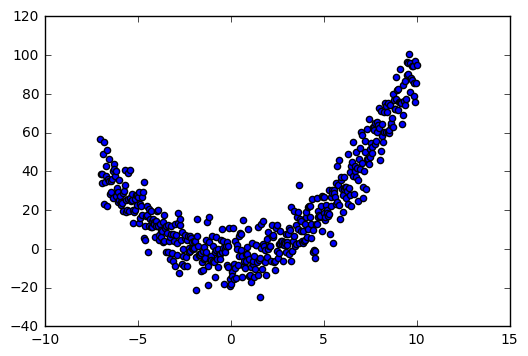

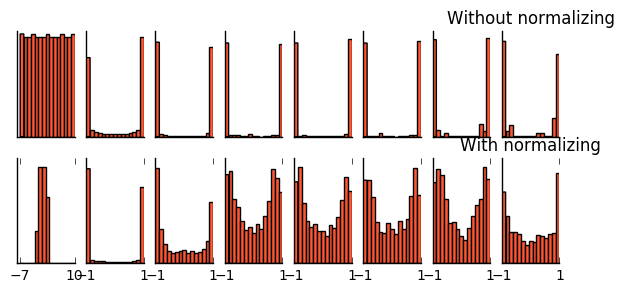

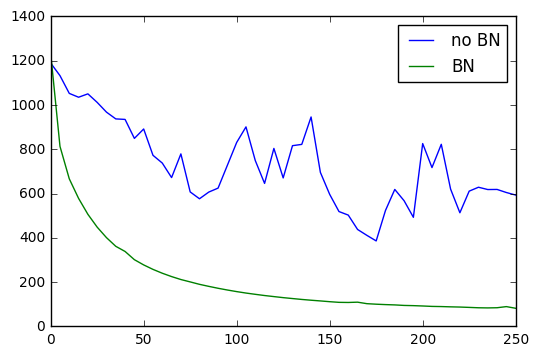

In [5]:
"""
visit https://morvanzhou.github.io/tutorials/ for more!

Build two networks.
1. Without batch normalization
2. With batch normalization

Run tests on these two networks.
"""

# 23 Batch Normalization

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


ACTIVATION = tf.nn.tanh
N_LAYERS = 7
N_HIDDEN_UNITS = 30


def fix_seed(seed=1):
    # reproducible
    np.random.seed(seed)
    tf.set_random_seed(seed)


def plot_his(inputs, inputs_norm):
    # plot histogram for the inputs of every layer
    for j, all_inputs in enumerate([inputs, inputs_norm]):
        for i, input in enumerate(all_inputs):
            plt.subplot(2, len(all_inputs), j*len(all_inputs)+(i+1))
            plt.cla()
            if i == 0:
                the_range = (-7, 10)
            else:
                the_range = (-1, 1)
            plt.hist(input.ravel(), bins=15, range=the_range, color='#FF5733')
            plt.yticks(())
            if j == 1:
                plt.xticks(the_range)
            else:
                plt.xticks(())
            ax = plt.gca()
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
        plt.title("%s normalizing" % ("Without" if j == 0 else "With"))
    plt.draw()
    plt.pause(0.01)


def built_net(xs, ys, norm):
    def add_layer(inputs, in_size, out_size, activation_function=None, norm=False):
        # weights and biases (bad initialization for this case)
        Weights = tf.Variable(tf.random_normal([in_size, out_size], mean=0., stddev=1.))
        biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)

        # fully connected product
        Wx_plus_b = tf.matmul(inputs, Weights) + biases

        # normalize fully connected product
        if norm:
            # Batch Normalize
            # when testing, you should fix fc_mean, fc_var instead of using tf.nn.moments!
            fc_mean, fc_var = tf.nn.moments(
                Wx_plus_b,
                axes=[0],   # the dimension you wanna normalize, here [0] for batch
                            # for image, you wanna do [0, 1, 2] for [batch, height, width] but not channel
            )
            scale = tf.Variable(tf.ones([out_size]))
            shift = tf.Variable(tf.zeros([out_size]))
            epsilon = 0.001
            Wx_plus_b = tf.nn.batch_normalization(Wx_plus_b, fc_mean, fc_var, shift, scale, epsilon)
            # similar with this two steps:
            # Wx_plus_b = (Wx_plus_b - fc_mean) / tf.sqrt(fc_var + 0.001)
            # Wx_plus_b = Wx_plus_b * scale + shift

        # activation
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)

        return outputs

    fix_seed(1)

    if norm:
        # BN for the first input
        fc_mean, fc_var = tf.nn.moments(
            xs,
            axes=[0],
        )
        scale = tf.Variable(tf.ones([1]))
        shift = tf.Variable(tf.zeros([1]))
        epsilon = 0.001
        xs = tf.nn.batch_normalization(xs, fc_mean, fc_var, shift, scale, epsilon)

    # record inputs for every layer
    layers_inputs = [xs]

    # build hidden layers
    for l_n in range(N_LAYERS):
        layer_input = layers_inputs[l_n]
        in_size = layers_inputs[l_n].get_shape()[1].value

        output = add_layer(
            layer_input,    # input
            in_size,        # input size
            N_HIDDEN_UNITS, # output size
            ACTIVATION,     # activation function
            norm,           # normalize before activation
        )
        layers_inputs.append(output)    # add output for next run

    # build output layer
    prediction = add_layer(layers_inputs[-1], 30, 1, activation_function=None)

    cost = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
    train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
    return [train_op, cost, layers_inputs]

# make up data
fix_seed(1)
x_data = np.linspace(-7, 10, 500)[:, np.newaxis]
noise = np.random.normal(0, 8, x_data.shape)
y_data = np.square(x_data) - 5 + noise

# plot input data
plt.scatter(x_data, y_data)
plt.show()

xs = tf.placeholder(tf.float32, [None, 1])  # [num_samples, num_features]
ys = tf.placeholder(tf.float32, [None, 1])

train_op, cost, layers_inputs = built_net(xs, ys, norm=False)   # without BN
train_op_norm, cost_norm, layers_inputs_norm = built_net(xs, ys, norm=True) # with BN

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# record cost
cost_his = []
cost_his_norm = []
record_step = 5

plt.ion()
plt.figure(figsize=(7, 3))
for i in range(251):
    if i % 50 == 0:
        # plot histogram
        all_inputs, all_inputs_norm = sess.run([layers_inputs, layers_inputs_norm], feed_dict={xs: x_data, ys: y_data})
        plot_his(all_inputs, all_inputs_norm)

    sess.run([train_op, train_op_norm], feed_dict={xs: x_data, ys: y_data})

    if i % record_step == 0:
        # record cost
        cost_his.append(sess.run(cost, feed_dict={xs: x_data, ys: y_data}))
        cost_his_norm.append(sess.run(cost_norm, feed_dict={xs: x_data, ys: y_data}))

plt.ioff()
plt.figure()
plt.plot(np.arange(len(cost_his))*record_step, np.array(cost_his), label='no BN')     # no norm
plt.plot(np.arange(len(cost_his))*record_step, np.array(cost_his_norm), label='BN')   # norm
plt.legend()
plt.show()

# when testing, you should fix fc_mean, fc_var instead of using tf.nn.moments!


